In [53]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas.plotting import table
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from numpy import dtype

In [47]:
# Load dataset
url = "https://raw.githubusercontent.com/Yogessh3/Kisan-Dosth/master/Crops.csv"
names = ['min_price','max_price','modal_price','district','region','commodity']
dataset = read_csv(url, names=names)

In [37]:
# shape
print(dataset.shape)

(184, 6)


In [48]:
# head
print(dataset.head(20))

    min_price  max_price  modal_price    district          region  \
0        2800       3000         2900  Coimbatore       Anaimalai   
1        3000       3200         3100  Coimbatore           Annur   
2        5800       7200         6300  Coimbatore      Coimbatore   
3        2000       3000         2500  Coimbatore       Karamadai   
4        3050       3150         3100  Coimbatore    Madathukulam   
5       10250      10300        10275  Coimbatore    Madathukulam   
6        1900       1950         1925  Coimbatore    Madathukulam   
7        1680       1720         1700  Coimbatore    Madathukulam   
8        3100       3200         3150  Coimbatore         Negamam   
9        2040       2240         2140  Coimbatore        Palladam   
10       9000      10000         9500  Coimbatore  Pethappampatti   
11       1800       1950         1850  Coimbatore  Pethappampatti   
12       2600       2900         2720  Coimbatore        Pollachi   
13       2100       2700         2

In [57]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 6 columns):
min_price      183 non-null int64
max_price      183 non-null int64
modal_price    183 non-null int64
district       183 non-null object
region         183 non-null object
commodity      183 non-null object
dtypes: int64(3), object(3)
memory usage: 8.7+ KB
None


In [34]:
# descriptions
print(dataset.describe())

       min_price max_price modal_price    district        region  \
count        184       184         184         184           184   
unique       150       153         159          19            86   
top         1500      1800        1850  Villupuram  Vikkiravandi   
freq           5         5           4          67            11   

                  commodity  
count                   184  
unique                   26  
top     Paddy(Dhan)(Common)  
freq                     53  


In [59]:
print(dataset.dtypes)

min_price       int64
max_price       int64
modal_price     int64
district       object
region         object
commodity      object
dtype: object


In [60]:
# class distribution
print(dataset.groupby('commodity').size())

commodity
Black Gram (Urd Beans)(Whole)    11
Cashewnuts                        1
Coconut                          24
Coconut Seed                      5
Copra                             9
Cotton                           10
Cowpea (Lobia/Karamani)           1
Gingelly Oil                      1
Green Gram (Moong)(Whole)         6
Groundnut                        13
Hybrid Cumbu                      3
Jowar(Sorghum)                    1
Karamani                          1
Kodo Millet(Varagu)               1
Kulthi(Horse Gram)                2
Maize                             9
Paddy(Dhan)(Common)              53
Ragi (Finger Millet)              7
Sesamum(Sesame,Gingelly,Til)     10
T.V. Cumbu                        3
Tamarind Fruit                    3
Tapioca                           1
Thinai (Italian Millet)           1
Tobacco                           1
Turmeric                          6
dtype: int64


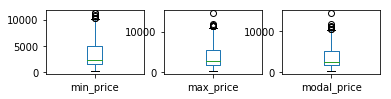

In [61]:
dataset.plot(kind='box', subplots=True, layout=(3,3))
pyplot.show()

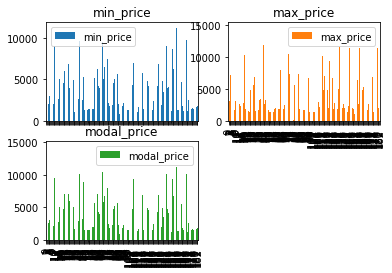

In [74]:
dataset.plot(kind='bar', subplots=True, layout=(2,2))
pyplot.show()

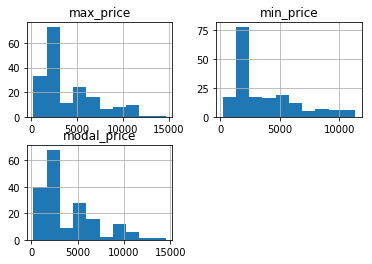

In [62]:
dataset.hist()
pyplot.show()

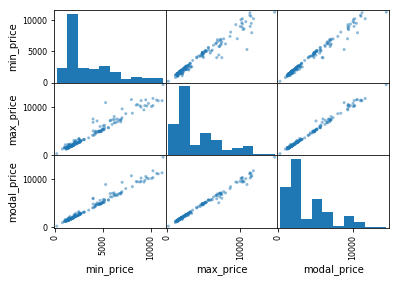

In [63]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [79]:
pyplot.show()

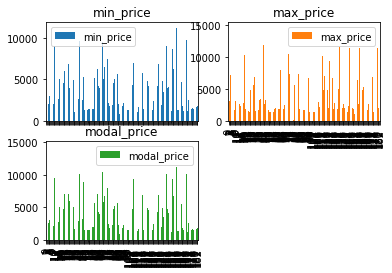

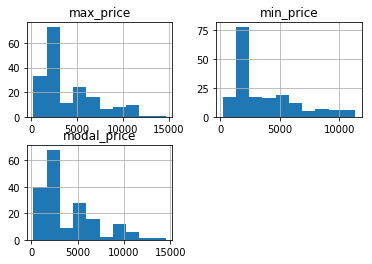

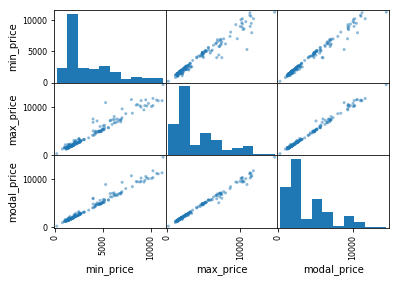

In [80]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/Yogessh3/Kisan-Dosth/master/Crops.csv"
names =['min_price','max_price','modal_price','district','region','commodity']
dataset = read_csv(url, names=names)
# box and whisker plots
dataset.plot(kind='bar', subplots=True, layout=(2,2))
pyplot.show()
# histograms
dataset.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [93]:
array = dataset.values
X = array[:,0:3]
y = array[:,3]
print(X)
print(y)

[[2800 3000 2900]
 [3000 3200 3100]
 [5800 7200 6300]
 [2000 3000 2500]
 [3050 3150 3100]
 [10250 10300 10275]
 [1900 1950 1925]
 [1680 1720 1700]
 [3100 3200 3150]
 [2040 2240 2140]
 [9000 10000 9500]
 [1800 1950 1850]
 [2600 2900 2720]
 [2100 2700 2400]
 [2170 2370 2270]
 [2700 2900 2800]
 [5000 5340 5100]
 [2700 2900 2800]
 [2700 2800 2750]
 [8900 10250 9350]
 [1800 1900 1850]
 [4559 4789 4789]
 [6036 7361 7034]
 [1344 1555 1500]
 [1616 1616 1616]
 [1407 1407 1407]
 [4606 4806 4706]
 [6861 7240 7036]
 [4000 7500 6000]
 [1000 1500 1200]
 [5200 5700 5600]
 [4000 6800 5900]
 [1000 1500 1200]
 [4900 5200 5000]
 [1100 2100 1600]
 [1500 1700 1600]
 [1500 1800 1650]
 [2505 3275 3000]
 [2535 3410 2870]
 [2635 3000 2935]
 [9605 10205 10195]
 [11300 14677 14509]
 [10249 11791 11681]
 [2500 2600 2530]
 [2505 3275 3225]
 [5305 10915 8845]
 [1350 1480 1420]
 [1427 1692 1560]
 [1450 1750 1550]
 [1220 1410 1350]
 [1360 1480 1420]
 [1427 1692 1560]
 [1450 1750 1550]
 [1427 1692 1560]
 [1400 1407 14

In [91]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
Y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [92]:
#Spot check algorthims
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.342725 (0.009392)
LDA: 0.344180 (0.016088)
KNN: 0.315873 (0.084956)
CART: 0.321958 (0.045362)
NB: 0.274339 (0.081506)
SVM: 0.379762 (0.028621)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has 

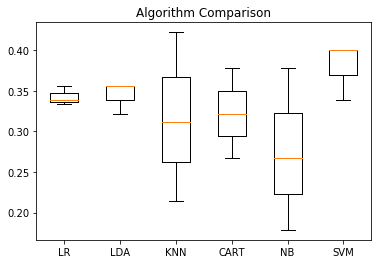

In [94]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')), ('CART', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('NB', GaussianNB(priors=None, var_

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y h

NB: 0.286131 (0.126458)
SVM: 0.431242 (0.147510)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


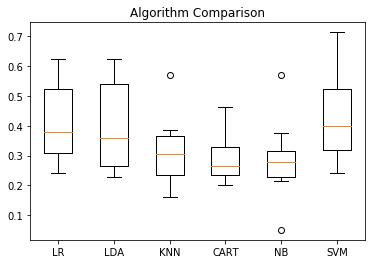

In [96]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Load dataset
url = "https://raw.githubusercontent.com/Yogessh3/Kisan-Dosth/master/Crops.csv"
names =['min_price','max_price','modal_price','district','region','commodity']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
print(models)
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [97]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [98]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5405405405405406
[[ 1  0  0  0  0  0  0  0  0  0  6]
 [ 0  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  2]
 [ 1  0  0  0  0  0  0  0  2  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0 12]]
              precision    recall  f1-score   support

  Coimbatore       0.50      0.14      0.22         7
  Dharmapuri       1.00      0.50      0.67         2
    Dindigul       0.00      0.00      0.00         1
       Erode       0.00      0.00      0.00         2
Kancheepuram       1.00      1.00      1.00         3
 Krishnagiri       1.00      1.00      1.00         1
     Madurai       0.00      0.00      0.00         1
       Salem       0.00      0.00      0.00         2
   Thanjavur       1.00      0.50      0.67         4
     Vellore       0.00      0.00      0.00

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Load dataset
url = "https://raw.githubusercontent.com/Yogessh3/Kisan-Dosth/master/Crops.csv"
names = ['min_price','max_price','modal_price','district','region','commodity']
dataset = read_csv(url, names=names)
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5405405405405406
[[ 1  0  0  0  0  0  0  0  0  0  6]
 [ 0  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  2]
 [ 1  0  0  0  0  0  0  0  2  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0 12]]
              precision    recall  f1-score   support

  Coimbatore       0.50      0.14      0.22         7
  Dharmapuri       1.00      0.50      0.67         2
    Dindigul       0.00      0.00      0.00         1
       Erode       0.00      0.00      0.00         2
Kancheepuram       1.00      1.00      1.00         3
 Krishnagiri       1.00      1.00      1.00         1
     Madurai       0.00      0.00      0.00         1
       Salem       0.00      0.00      0.00         2
   Thanjavur       1.00      0.50      0.67         4
     Vellore       0.00      0.00      0.00

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
